In [1]:
# imports and settings
%run plot_settings.py
%matplotlib inline

# load experimental data
path = '/Users/stephan/Desktop/GitHub/gene_transcription_SMC_ABC/experimental_data/'
Data_first = np.loadtxt(path+'Data_first.csv')
Data_second = np.loadtxt(path+'Data_second.csv')
Mock_dual = np.loadtxt(path+'Mock_dual.csv')

# load simulations shown in figure
path = '/Users/stephan/Desktop/GitHub/gene_transcription_SMC_ABC/simulations/'
sim_w_variability_first = np.loadtxt(path+'fig5_sim_with_variability_allele1.csv')
sim_w_variability_second = np.loadtxt(path+'fig5_sim_with_variability_allele2.csv')

sim_wo_variability_first = np.loadtxt(path+'fig5_sim_without_variability_allele1.csv')
sim_wo_variability_second = np.loadtxt(path+'fig5_sim_without_variability_allele2.csv')

time_dual = np.arange(0,Data_first.shape[0])*3
scale = 23.3

# Figure 5 A, individual dual allele time courses 

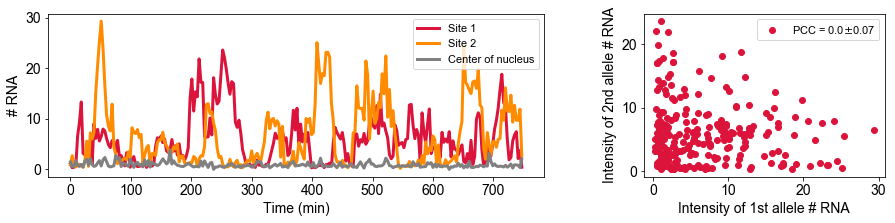

In [7]:
fig = pl.figure(figsize = (15,3))

gs = gridspec.GridSpec(1,10)

ax = fig.add_subplot(gs[0,0:6])

# specify the cell from the data set to plot, 37 
ind = 37

ax.plot(time_dual,Data_second[:,ind]/scale, lw = 3, color = 'crimson', label = 'Site 1')
ax.plot(time_dual,Data_first[:,ind]/scale, lw = 3, color = 'darkorange', label = 'Site 2')
ax.plot(time_dual,Mock_dual[:,ind]/scale, lw = 3, color = 'grey', label = 'Center of nucleus')
ax.legend(loc = 'best')
ax.set_xlabel('Time (min)')
ax.set_ylabel('# RNA')

ax = fig.add_subplot(gs[0,7:])
corr = boot_corr(Data_first[:,ind]/scale,Data_second[:,ind]/scale, 100)
ax.plot(Data_first[:,ind]/scale,Data_second[:,ind]/scale, 'o', color = 'crimson', 
        label = 'PCC = '+ str(np.round(corr.mean(), 2)) + '$\pm$' + str(np.round(corr.std(), 2)))
ax.set_xlabel('Intensity of 1st allele # RNA')
ax.set_ylabel('Intensity of 2nd allele # RNA')
ax.legend(loc = 'best')

# Figure 5B, direct correlation

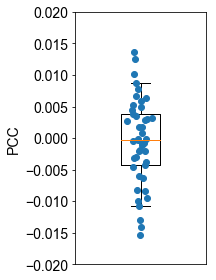

In [4]:
# calculate PCC for all cells
index = np.arange(0,Data_first.shape[1])
pcc = np.zeros(len(index))
for ii in index:
    pcc[ii] = boot_corr(Data_first[:,ii],Data_second[:,ii],100).mean()
    
    
fig,ax = pl.subplots(1,1, figsize = (3,4))

ax.boxplot(pcc, whis = [5,95], showfliers = False, widths = 0.3, patch_artist=False);

x = np.random.normal(1,0.04,45)
ax.plot(x,pcc, 'o', ms = 6)
ax.set_ylabel('PCC')
ax.set_xticks([])
ax.set_ylim(-0.02,0.02)
pl.tight_layout()

# Figure 5 C & E, dual allele data & simulation color maps

In [9]:
def plot_fig5_color_maps(dual_data,dual_simulations):
    cmap = matplotlib.cm.viridis
    interpolation = 'none'
    aspect = 'auto'
    c_max = 50
    ticks = np.arange(0, 251, 60)
    n_samples = 1000
    col_1 = 'crimson'
    col_2 = 'darkorange'
    
    fig = pl.figure(figsize=(17,10))
    gs = gridspec.GridSpec(1,21)
    
    # dual allele data color map
    ax = fig.add_subplot(gs[0,0:8])
    dual_data_sorted = sort_dual_sims(dual_data)
    mat = dual_allele_matrix(dual_data_sorted)
    cax = ax.imshow(mat / 23.15, interpolation=interpolation, aspect=aspect, cmap=cmap)
    cax.set_clim(0, c_max)
    ax.set_yticks([])
    auc_1 = np.trapz(dual_data[0], dx=3, axis=0) / 29. / 23.3
    auc_2 = np.trapz(dual_data[1], dx=3, axis=0) / 29. / 23.3
    auc = np.hstack((auc_1,auc_2))
    CV = auc.std() / auc.mean()
    print(CV**2)
    ax.set_title('Data, $CV = $' + str(np.round(CV**2, 3)), fontsize = 15)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks * 3)
    ax.set_xlabel('Time (min)')
  
    # color bar
    cbar = fig.add_axes([0.1, 0.15, 0.012, 0.505])
    fig.colorbar(cax, cax=cbar, orientation="vertical", ticks=[0, 25, 50])
    cbar.set_ylabel('# RNA', labelpad=-50)
    cbar.yaxis.set_ticks_position('left')
    
    # dual allele data, area under the curve
    ax = fig.add_subplot(gs[0,8:10])
    auc_data = np.trapz(mat, dx=3, axis=1) / 33.15 / 29.
    index_1 = np.arange(0, 135, 3)
    index_2 = index_1 + 1
    ax.plot(auc_data[index_1], -index_1, lw=3, label='1', color=col_1)
    ax.plot(auc_data[index_2], -index_1, lw=3, label='2', color=col_2)
    ax.set_ylim(-132, 0)
    ax.legend(loc='upper right', fontsize=10)
    ax.set_xticks([0, 1000])
    ax.set_yticks([])
    ax.set_xlabel('# RNA')
    
    # dual allele simulations, color map
    ax = fig.add_subplot(gs[11:19])
    dual_data_sorted = sort_dual_sims(dual_simulations)
    mat = dual_allele_matrix(dual_data_sorted)
    cax = ax.imshow(mat / 23.15, interpolation=interpolation, aspect=aspect, cmap=cmap)
    cax.set_clim(0, c_max)
    ax.set_yticks([])
    auc_1 = np.trapz(dual_simulations[0], dx=3, axis=0) / 29. / 23.3
    auc_2 = np.trapz(dual_simulations[1], dx=3, axis=0) / 29. / 23.3
    auc = np.hstack((auc_1,auc_2))
    CV = auc.std() / auc.mean()
    print(CV**2)
    ax.set_title('Simulations, $CV = $' + str(np.round(CV**2, 3)), fontsize = 15)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks * 3)
    ax.set_xlabel('Time (min)')

    # dual allele simulations, area under the curve
    ax = fig.add_subplot(gs[0,19:])
    auc_data = np.trapz(mat, dx=3, axis=1) / 33.15 / 29.
    index_1 = np.arange(0, 135, 3)
    index_2 = index_1 + 1
    ax.plot(auc_data[index_1], -index_1, lw=3, label='1', color=col_1)
    ax.plot(auc_data[index_2], -index_1, lw=3, label='2', color=col_2)
    ax.set_ylim(-132, 0)
    ax.legend(loc='upper right', fontsize=13)
    ax.set_xticks([0, 1000])
    ax.set_yticks([])
    ax.set_xlabel('# RNA')

0.425835289286
0.365224894388


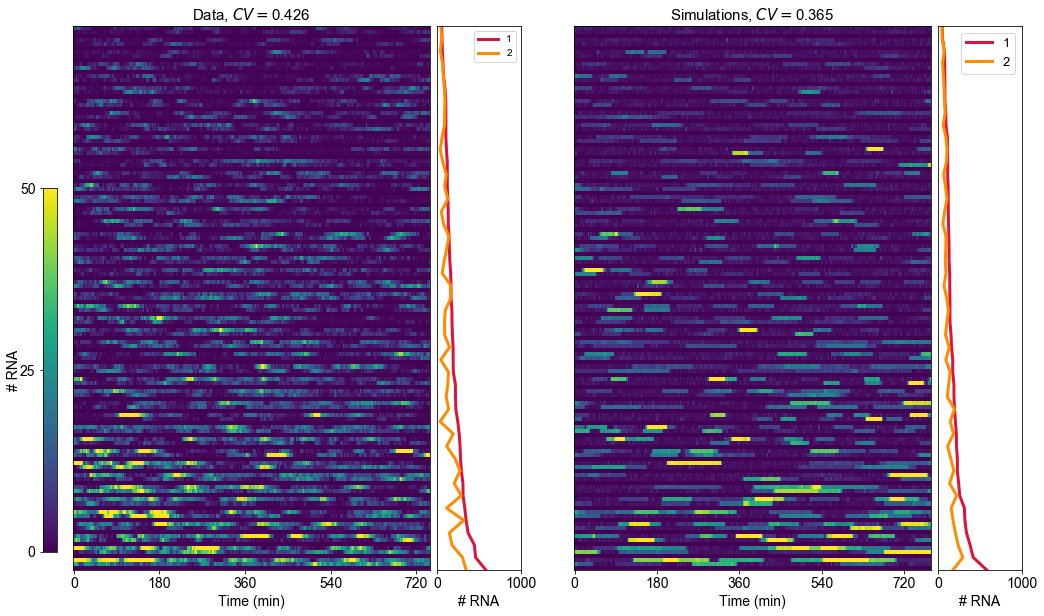

In [10]:
plot_fig5_color_maps([Data_first,Data_second],[sim_w_variability_first,sim_w_variability_second])

# Figure 5 D & F, correlation of transcriptional output

In [11]:
def plot_fig5_correlations(dual_data,dual_simulations_noise, dual_simulations_no_noise):
    
    n_samples = 100
    
    fig,ax = pl.subplots(1,2, figsize=(12,5))
    
    # dual allele data
    DD_1 = np.hstack((dual_data[0], dual_data[1]))
    DD_2 = np.hstack((dual_data[1], dual_data[0]))
    boot_corr_data_pair, boot_corr_data_rand = bootstrap_corr([DD_1, DD_2], n_samples)
    auc_1 = np.trapz(DD_1, dx=3, axis=0) / 33.15 / 29.3
    auc_2 = np.trapz(DD_2, dx=3, axis=0) / 33.15 / 29.3
    rand = np.random.choice(np.arange(0, len(auc_1)), len(auc_1), replace=False)
    ax[0].plot(auc_1[rand], auc_2, 'o', ms=5, color='lightgrey',
            label='Random, corr = ' + str(abs(np.round(boot_corr_data_rand.mean(), 2))) + '$\pm$' +
                  str(np.round(boot_corr_data_rand.std(), 2)))
    ax[0].plot(auc_1, auc_2, 'o', color='crimson', ms=7,
            label='Pairs, corr = ' + str(np.round(boot_corr_data_pair.mean(), 2)) + '$\pm$' +
                  str(np.round(boot_corr_data_pair.std(), 2)))

    ax[0].legend(loc='best')
    ax[0].set_ylabel('RNA output 1st allele (#RNA)')
    ax[0].set_xlabel('RNA output 2nd allele (#RNA)')
    #    ax[0].set_yscale('log')
    #    ax[0].set_xscale('log')
    ax[0].set_ylim(30, 750)
    ax[0].set_xlim(30, 750)
    ax[0].set_title('Correlation, data')
    
    # dual allele simulations
    DD_1 = np.hstack((dual_simulations_no_noise[0], dual_simulations_no_noise[1]))
    DD_2 = np.hstack((dual_simulations_no_noise[1], dual_simulations_no_noise[0]))
    boot_corr_data_pair, boot_corr_data_rand = bootstrap_corr([DD_1, DD_2], n_samples)
    auc_1 = np.trapz(DD_1, dx=3, axis=0) / 33.15 / 29.3
    auc_2 = np.trapz(DD_2, dx=3, axis=0) / 33.15 / 29.3
    
    ax[1].plot(auc_1, auc_2, 'o', color='dodgerblue', ms=7,
            label='Pairs, corr = ' + str(np.round(boot_corr_data_pair.mean(), 2)) + '$\pm$' +
                  str(np.round(boot_corr_data_pair.std(), 2)))
    
    DD_1 = np.hstack((dual_simulations_noise[0], dual_simulations_noise[1]))
    DD_2 = np.hstack((dual_simulations_noise[1], dual_simulations_noise[0]))
    boot_corr_data_pair, boot_corr_data_rand = bootstrap_corr([DD_1, DD_2], n_samples)
    auc_1 = np.trapz(DD_1, dx=3, axis=0) / 33.15 / 29.3
    auc_2 = np.trapz(DD_2, dx=3, axis=0) / 33.15 / 29.3
    
    ax[1].plot(auc_1, auc_2, 'o', color='crimson', ms=7,
            label='Pairs, corr = ' + str(np.round(boot_corr_data_pair.mean(), 2)) + '$\pm$' +
                  str(np.round(boot_corr_data_pair.std(), 2)))
    
    ax[1].legend(loc='best')
    ax[1].set_ylabel('RNA output 1st allele (#RNA)')
    ax[1].set_xlabel('RNA output 2nd allele (#RNA)')
    #    ax[1].set_yscale('log')
    #    ax[1].set_xscale('log')
    ax[1].set_ylim(30, 750)
    ax[1].set_xlim(30, 750)
    ax[1].set_title('Correlation, data')

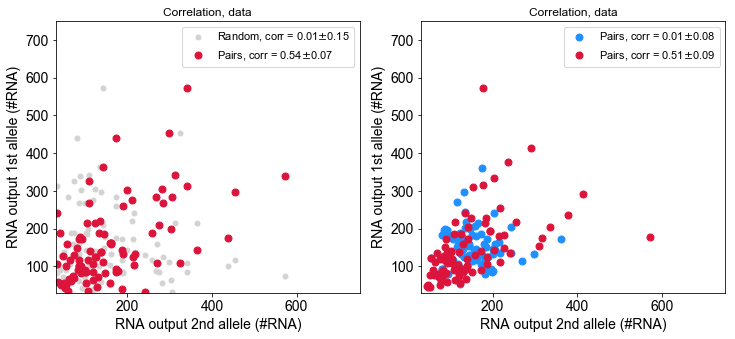

In [12]:
plot_fig5_correlations([Data_first,Data_second],[sim_w_variability_first,sim_w_variability_second],
                      [sim_wo_variability_first,sim_wo_variability_second])

# Simulate dual allele data sets